In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases
# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [129]:
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful hp_roman8
successful cp1255
successful mac_latin2
successful iso8859_11
successful cp860
successful utf_16_be
successful cp1250
successful big5hkscs
successful cp855
successful mac_iceland
successful cp037
successful cp850
successful cp932
successful mac_greek
successful cp437
successful ptcp154
successful cp1252
successful cp1258
successful cp865
successful cp1256
successful iso8859_13
successful cp775
successful cp1257
successful iso8859_15
successful iso8859_4
successful cp1251
successful cp869
successful cp852
successful iso8859_6
successful iso8859_8
successful cp862
successful utf_16_le
successful iso8859_14
successful iso8859_3
successful cp1125
successful cp858
successful cp273
successful iso8859_10
successful cp864
successful kz1048
successful mac_turkish
successful gb18030
successful iso8859_5
successful iso8859_7
successful cp857
successful cp861
successful mbcs
successful gbk
successful mac_roman
successful cp500
successful cp863
successful latin_1
successful mac

In [130]:
df = pd.read_csv("crime.csv", encoding="cp775")
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [131]:
df.shape

(319073, 17)

In [132]:
df.duplicated().sum()

23

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.shape

(319050, 17)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [136]:
df["SHOOTING"].fillna('N')

0         N
1         N
2         N
3         N
4         N
         ..
319068    N
319069    N
319070    N
319071    N
319072    N
Name: SHOOTING, Length: 319050, dtype: object

In [137]:
df.OCCURRED_ON_DATE = pd.to_datetime(df.OCCURRED_ON_DATE)

In [138]:
df.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [139]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [140]:
df.columns[np.sum(df.isnull()) !=0]

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [141]:
df.columns[np.sum(df.isnull()) ==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

# Question 1 - What are the most common offense descriptions?
# Hint - Use value_counts() to print out the values
# Question 2 - Now try and create a bar chart of the Top 10 Offense Descriptions as a % of total dfs

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

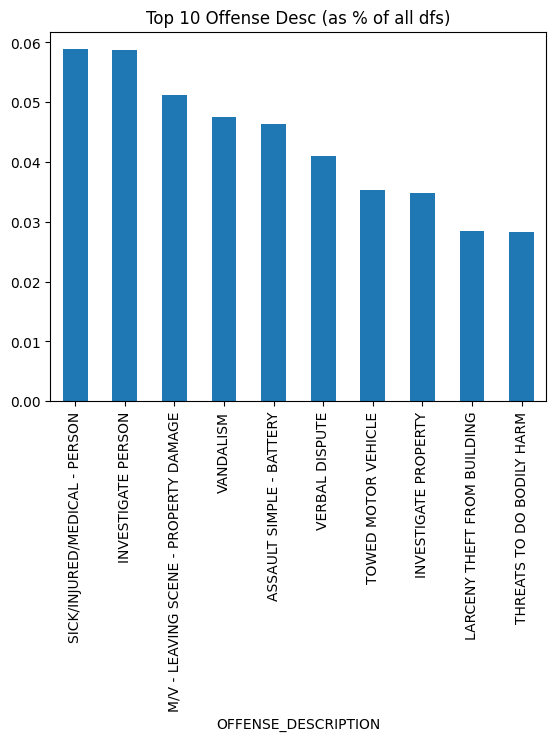

In [142]:
offense_desc_vals = df.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_desc_vals / df.shape[0])

# Creating a bar chart of the Top 10 offense desc
(offense_desc_vals / df.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Desc (as % of all dfs)');

# Question 3 - Are there more crimes committed on specific days?

DAY_OF_WEEK
Friday       48489
Monday       45674
Saturday     44816
Sunday       40313
Thursday     46655
Tuesday      46376
Wednesday    46727
Name: INCIDENT_NUMBER, dtype: int64


<Axes: xlabel='DAY_OF_WEEK'>

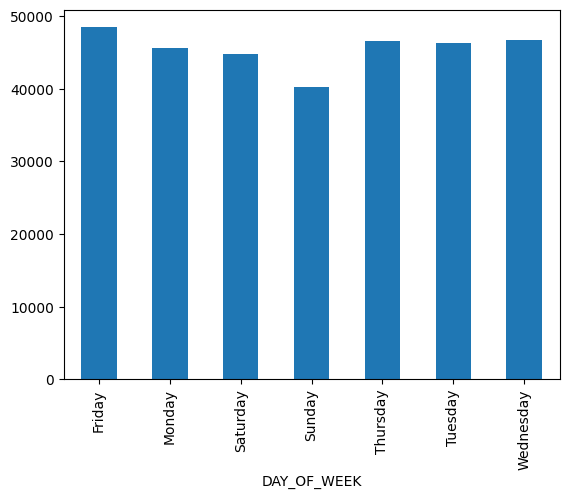

In [143]:
by_day = df.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']
print(by_day)
by_day.plot(kind='bar')

# On what days and during which hours are the most dfs committed?

In [144]:
df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

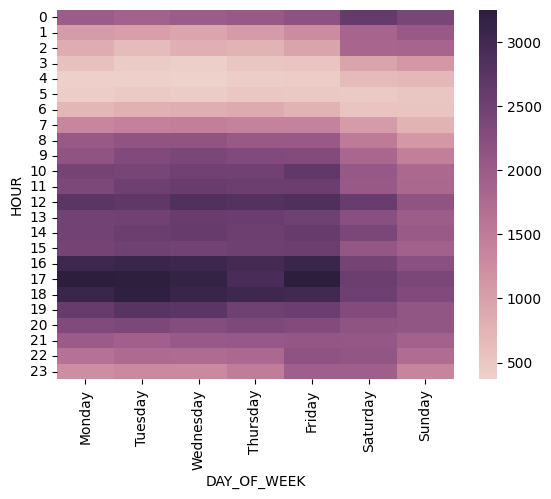

In [145]:
week_and_hour = df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True))

# Question 4 - In which districts were the most crimes commmitted on yearly basis? 

In [149]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [166]:
district_by_year = df.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2 = district_by_year.style.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)
s2

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

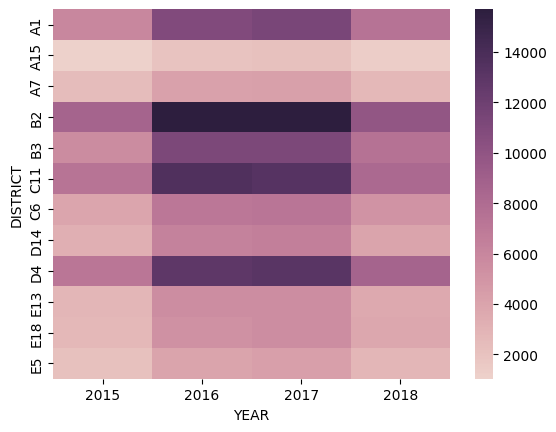

In [157]:
sns.heatmap(district_by_year, cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: xlabel='DISTRICT'>

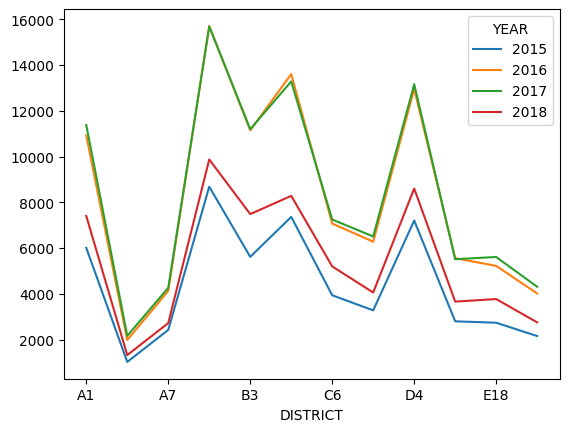

In [170]:
district_by_year.plot(kind='line')